<a href="https://colab.research.google.com/github/Krutika-bhandekar/Netflix-Movies-and-TV-Shows-Clustering/blob/main/netflix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**-
**Netflix Movies & TV shows Clustering -Unsupervised Learning**

##### **Project Type**    - Unsupervised Learning

#####  **Team Member 1 -** Krutika Bhandekar

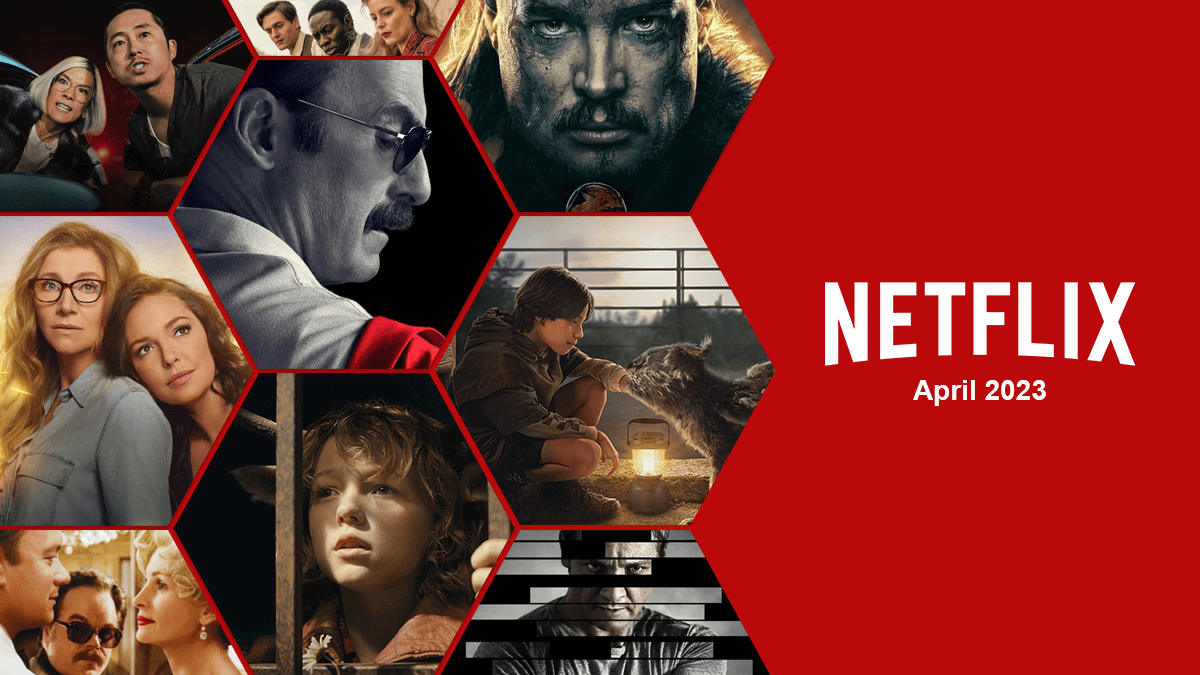

# **Project Summary -**

The objective of this project is to analyze and cluster a dataset related to Netflix. **The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters**.

To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. **Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features**.

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. **The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

After the clustering process, the results will be evaluated and interpreted. **The clusters will be analyzed to understand the common characteristics and patterns within each group. This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies**.

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. **Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix** to enhance user experience and content offerings.

**In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights and recommendations based on the clustering results. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company**.

# **GitHub Link -**

https://github.com/Krutika-bhandekar

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# ***Let's Begin !***


## ***1. Know Your Data***

In [1]:
# Import Libraries

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00


In [4]:
path = '/content/drive/MyDrive/csv_files/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [5]:
netflix_movies1= pd.read_csv(path)


### Dataset First View

In [6]:
netflix_movies1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
netflix_movies1.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
netflix_movies1['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

### Dataset Rows & Columns count

In [9]:
netflix_movies1.index

RangeIndex(start=0, stop=7787, step=1)

In [10]:
netflix_movies1.shape

(7787, 12)

In [11]:
netflix_movies1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [12]:
netflix_movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [13]:
netflix_movies1.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
netflix_movies1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
#total null values in the netflix Dataset
netflix_movies1.isnull().sum().sum()

3631

In [16]:
# Visualizing the missing values
#Handling Null Values
netflix_movies1['cast'].fillna(value='No cast',inplace=True)
netflix_movies1['country'].fillna(value=netflix_movies1['country'].mode()[0],inplace=True)

In [17]:
netflix_movies1.shape

(7787, 12)

### **What did you know about your dataset?**




**Answer Here**

This dataset  contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
netflix_movies1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# Dataset Describe
netflix_movies1.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7787,7787,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6832,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",No cast,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,718,3062,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### **Variables Description**

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
print(netflix_movies1.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


In [21]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
netflix_movies1["date_added"] = pd.to_datetime(netflix_movies1['date_added'])  # First convert date_added to date time format.
netflix_movies1['day_added'] = netflix_movies1['date_added'].dt.day            # Compute day.
netflix_movies1['year_added'] = netflix_movies1['date_added'].dt.year          # Compute year.
netflix_movies1['month_added'] = netflix_movies1['date_added'].dt.month        # Compute month.

### **What all manipulations have you done and insights you found?**

**Answer Here.**

We can gather the following insights from the dataset:

**Director:** There are missing values in the "Director" column.

**Country:** There are missing values in the "Country" column, which have been filled with zero.

**Cast:** There are missing values in the "Cast" column, which have been filled with "No cast."

**Date Added:** There are missing values in the "Date Added" column.

 **Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in  each column has to find unique items from different columns.**

**Date_addded Column:** In the "Date Added" column, additional information has been extracted such as the day, month, and year.

**In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero.** Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [23]:
import plotly.graph_objects as go

# Calculate the values
values = [netflix_movies1['type'].value_counts()['TV Show'], netflix_movies1['type'].value_counts()['Movie']]

# Define the labels and colors
labels = ['TV Show', 'Movie']
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, marker=dict(colors=colors))])

# Customize layout
fig.update_layout(
    title='Type of Content Watched on Netflix',
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Show the chart
fig.show()


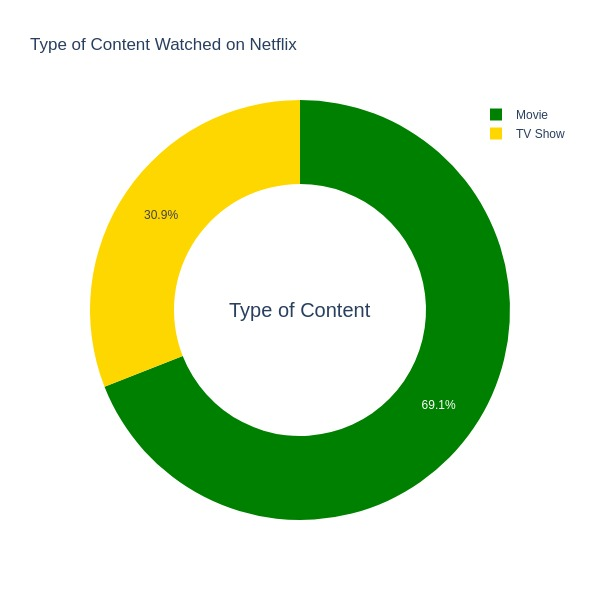

In [24]:
from IPython.display import Image
img_bytes = fig.to_image(format="jpeg", width=600, height=600, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**


**Answer Here**

A pie chart is suitable for visualizing categorical data and showing the proportions of different categories as parts of a whole. In this case, the chart is used to display the distribution of content types (TV shows and movies) watched on Netflix.

#####**2. What is/are the insight(s) found from the chart?**


**Answer Here**

1. Proportion of TV Shows
2. Proportion of Movies
3. Comparison of TV Shows and Movies

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Positive Business Impact:

1. Understanding Viewer Preferences
2. Content Acquisition and Licensing
3. Targeted Marketing and Promotion

Negative Growth:

1. Lack of Content Diversity
2. Limited Audience Reach

#### Chart - 2

In [26]:

# Filter the data for TV shows and movies
tv_show = netflix_movies1[netflix_movies1['type'] == 'TV Show']
movie = netflix_movies1[netflix_movies1['type'] == 'Movie']

# Calculate the content counts for each category
content_1 = tv_show['year_added'].value_counts().sort_index()
content_2 = movie['year_added'].value_counts().sort_index()

# Create traces for TV shows and movies
trace1 = go.Scatter(x=content_1.index, y=content_1.values, name='TV Shows', marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name='Movies', marker=dict(color='#ffd700', line=dict(width=4)))

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title='Content added over the years', title_x=0.5, legend=dict(x=0.8, y=1.1, orientation='h')))

# Show the chart
fig.show()


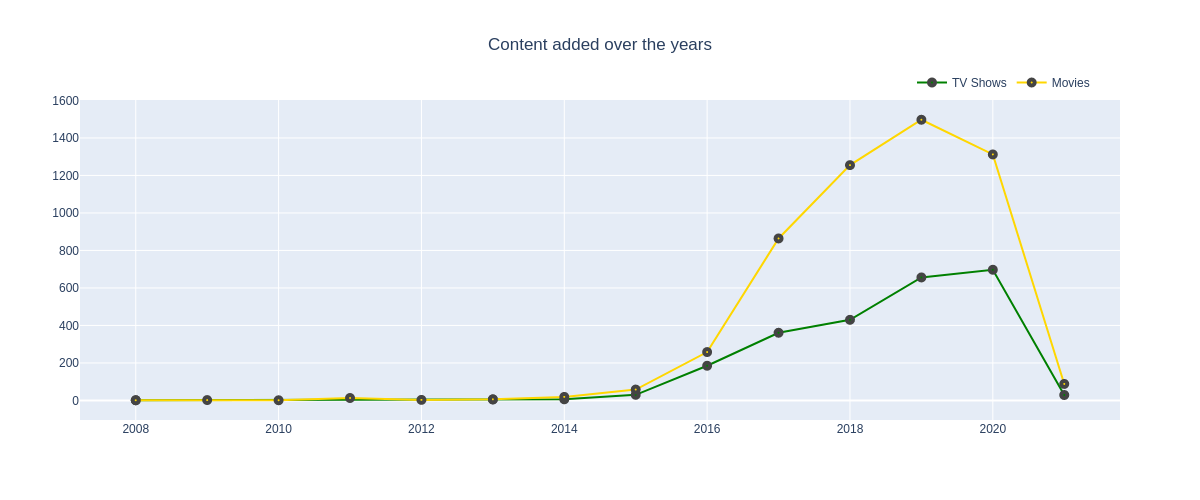

In [27]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1200, height=500, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

 A line chart is suitable for visualizing trends and changes over time. In this case, the chart is used to display the number of TV shows and movies added to Netflix's content library over the years.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

 1. Content Growth Over Time
 2. Yearly Fluctuations
 3. Comparison between TV Shows and Movies
 4. Content Strategy

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Positive Business Impact:

1. Content Planning and Strategy
2. Subscriber Engagement and Retention
3. Competitive Positioning

Negative Growth:

1. Declining Content Additions
2. Lack of Variety


#### Chart - 3

In [28]:

# Calculate the month values and counts
months_df = netflix_movies1['month_added'].value_counts().reset_index()

# Rename the columns
months_df.columns = ['month', 'count']

# Sort the DataFrame by month
months_df.sort_values('month', inplace=True)

# Show the DataFrame
months_df


,month,count
2,1.0,757
11,2.0,472
4,3.0,669
7,4.0,601
9,5.0,543
10,6.0,542
8,7.0,600
6,8.0,618
5,9.0,619
1,10.0,785


In [29]:
import plotly.express as px

# Create the bar chart using Plotly Express
fig = px.bar(
    months_df,
    x='month',
    y='count',
    text='count',
    color='count',
    color_continuous_scale=['#0000FF', '#FFFF00']
)

# Update the layout of the chart
fig.update_layout(
    title='Month wise Addition of Movies and TV Shows on Netflix',
    title_x=0.5,
    autosize=False,
    width=1000,
    height=500,
    showlegend=True
)

# Show the chart
fig.show()


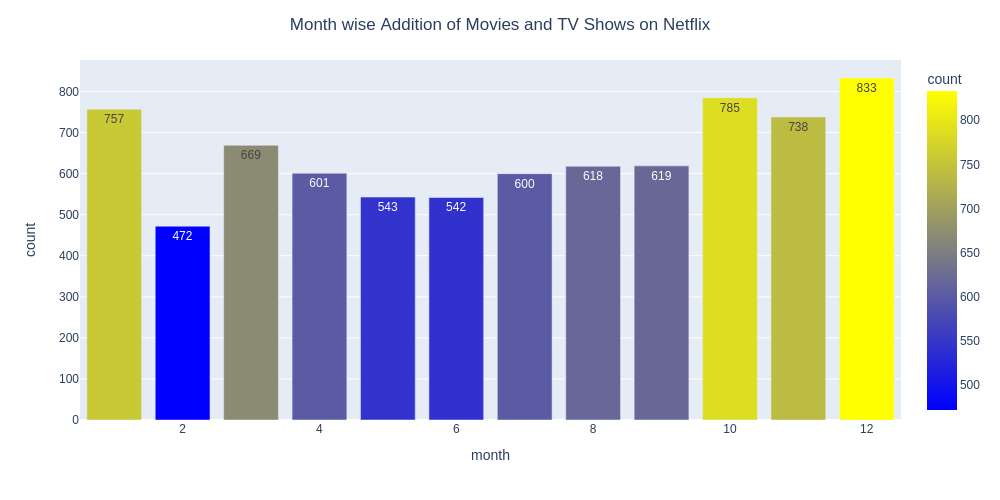

In [30]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=500, scale=1)
Image(img_bytes)

#####**1. Why did you pick the specific chart?**

**Answer Here.**

A bar chart is suitable for comparing categorical data and displaying the frequency or count of different categories. In this case, the chart is used to visualize the month-wise addition of movies and TV shows on Netflix.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

1. Monthly Content Additions
2. Seasonal Patterns
3. Strategic Content Planning
4. Content Marketing Opportunitie

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Positive Business Impact:

1. Strategic Content Release
2. Seasonal Content Promotion

Negative Growth:

1. Inconsistent Content Additions
2. Inconsistent Content Additions



#### Chart - 4

In [31]:

# Create the countplot using Plotly Express
fig = px.histogram(
    netflix_movies1,
    x='month_added',
    color='type',
    color_discrete_sequence=['#FF0000', '#0000FF']
)

# Update the layout of the chart
fig.update_layout(
    xaxis_title='Month Added',
    yaxis_title='Count',
    title='Distribution of TV Shows and Movies by Month Added',
    barmode='group'
)

# Show the chart
fig.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

 A countplot is suitable for visualizing the count or frequency of categorical data. In this case, the chart is used to display the count of content additions (TV shows and movies) on Netflix based on the month they were added.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

1. Monthly Content Additions
2. Comparison between TV Shows and Movies
3. Seasonal Patterns
4. Content Type Preferences

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Positive Business Impact:

1. Strategic Content Planning
2. Viewer Engagement
3. Content Diversity

Negative Growth:

1. Lack of Consistency
2. Overemphasis on Specific Months

#### Chart - 5

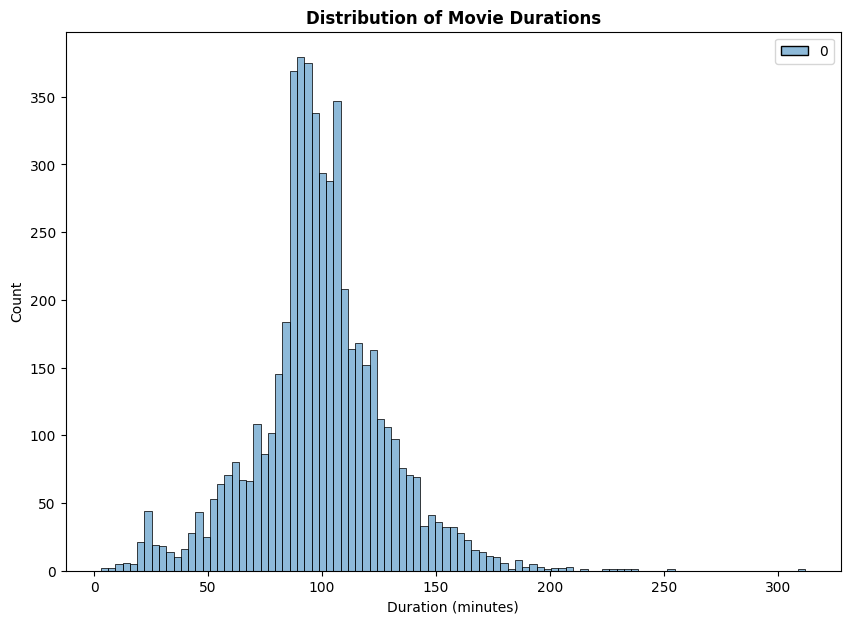

In [36]:
plt.figure(figsize=(10,7))
sns.histplot(movie['duration'].str.extract('(\d+)').astype(float), kde=False, color='red')
plt.title('Distribution of Movie Durations', fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


1.**Why did you pick the specific chart?**


**Answer Here**

A histogram is commonly used to display the frequency or count of data within specific bins or ranges. It provides insights into the distribution and helps identify patterns or outliers.



2.**What is/are the insight(s) found from the chart?**

**Answer Here**

1. Movie Duration Distribution
2. Most Common Duration Ranges
3. Distribution Shape
4. Content Planning

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Positive Business Impact:

1. Content Planning and Acquisition
2. Viewer Satisfaction

Negative Growth:

1. Lack of Variety
2. Disconnection from Viewer Preferences

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

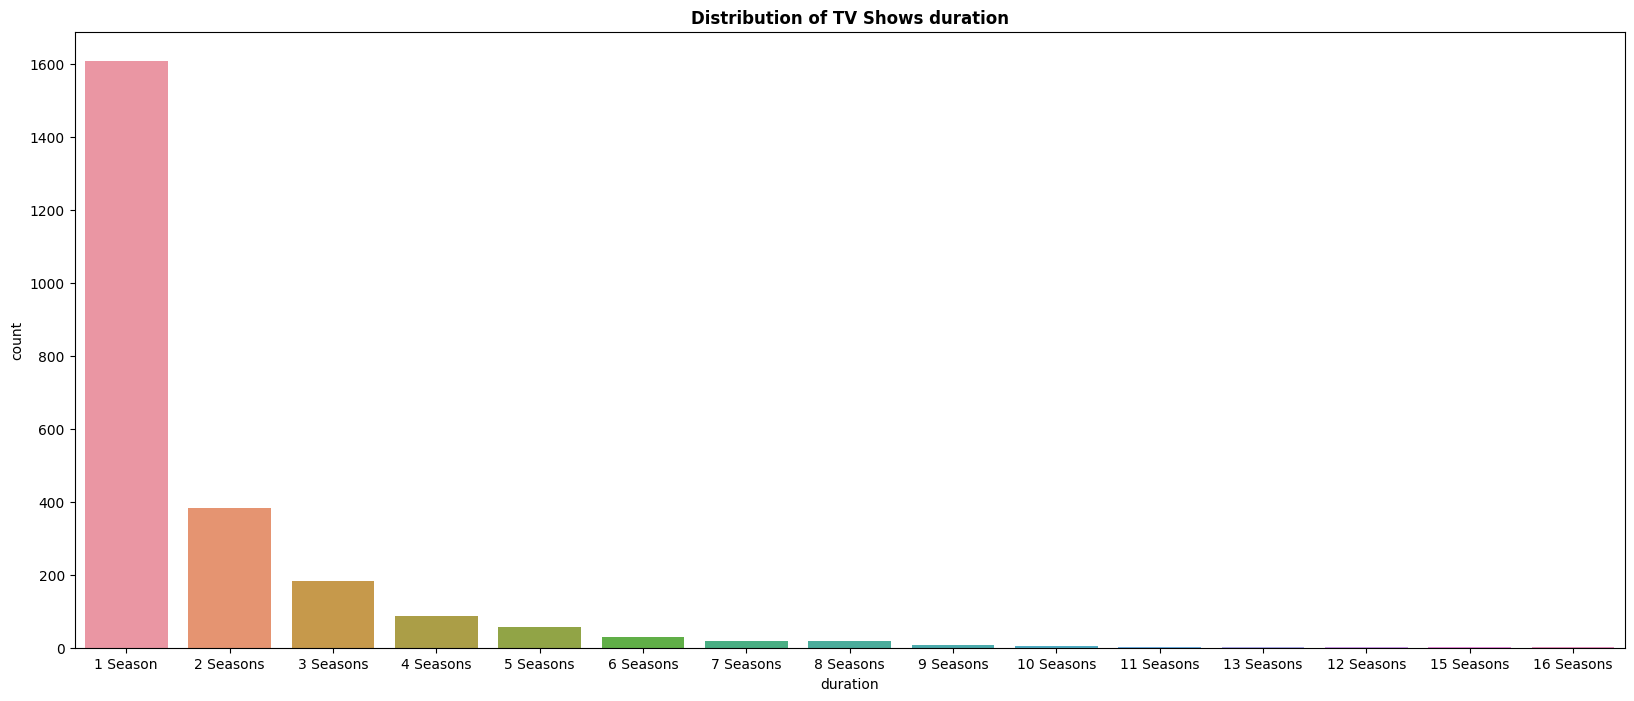

In [37]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

A countplot is suitable for visualizing the count or frequency of categorical data. In this case, the chart is used to display the distribution of TV show durations on Netflix.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

1. TV Show Duration Distribution
2. Most Common Duration Ranges
3. Range of TV Show Durations
4. Content Planning

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

Positive Business Impact:

1. Content Planning and Acquisition
2. Viewer Satisfaction

Negative Growth:

1. Lack of Variety
2. Disconnection from Viewer Preferences

#### Chart - 6

([<matplotlib.patches.Wedge at 0x7f30abb2acb0>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

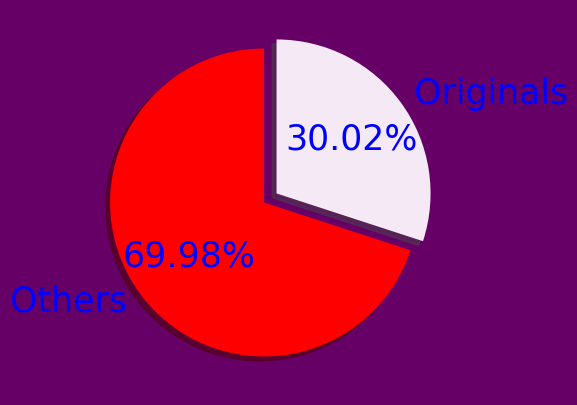

In [43]:
# Chart - 6 visualization code
movie['originals'] = np.where(movie['release_year'] == movie['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#660066")
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)
ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"blue", 'fontsize': 25}, colors =['red','#F5E9F5'])


##### **1. Why did you pick the specific chart?**

**Answer Here.**

A pie chart is suitable for representing the proportions or percentages of different categories within a whole. In this case, the chart is used to show the percentage of movies on Netflix that are "Originals" versus those that are not.



##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

1. Proportion of Originals
2. Proportion of Others
3. Comparison of Originals and Others
4. Highlighting Originals

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

1. Promotion of Originals
2. Competitive Advantage
3. Viewer Preferences

#### Chart - 7

In [44]:
netflix_movies1['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              No cast
Name: cast, Length: 7787, dtype: object

In [45]:
# seperating actors from cast column
cast = netflix_movies1['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

No cast             718
Anupam Kher          42
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30
                   ... 
Archie Alemania       1
Demore Barnes         1
Marty Adams           1
Nicole Boivin         1
Rachel Khoo           1
Length: 32882, dtype: int64

In [46]:
cast =cast[cast != 'No cast']


In [47]:
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

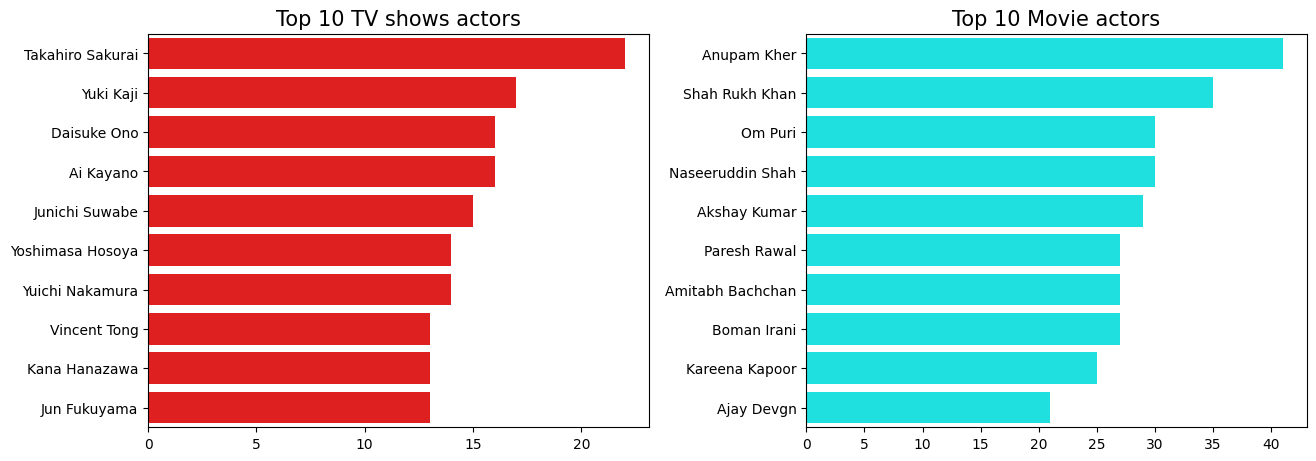

In [48]:

# Filter TV show actors
top_TVshows_actor = netflix_movies1[netflix_movies1['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor = top_TVshows_actor[top_TVshows_actor != 'No cast']
top_TVshows_actor_counts = top_TVshows_actor.value_counts().head(10)

# Filter movie actors
top_movie_actor = netflix_movies1[netflix_movies1['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor = top_movie_actor[top_movie_actor != 'No cast']
top_movie_actor_counts = top_movie_actor.value_counts().head(10)

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot TV show actors
sns.barplot(x=top_TVshows_actor_counts, y=top_TVshows_actor_counts.index, ax=ax[0], color='red')
ax[0].set_title('Top 10 TV shows actors', size=15)

# Plot movie actors
sns.barplot(x=top_movie_actor_counts, y=top_movie_actor_counts.index, ax=ax[1], color='cyan')
ax[1].set_title('Top 10 Movie actors', size=15)

# Adjust layout and display the chart
plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The horizontal bar chart allows for easy comparison between actors and provides a clear visual representation of their rankings. The use of different colors (red for TV show actors and cyan for movie actors) helps distinguish between the two categories.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

1. Top TV Show Actors: The chart displays the top 10 actors who have appeared in TV shows on Netflix. It provides a visual representation of the actors' popularity based on the frequency of their appearances. Viewers can identify the actors who have appeared most frequently in TV shows.

2. Top Movie Actors: The chart also showcases the top 10 actors who have appeared in movies on Netflix. Similar to the TV show actors, it presents the actors' popularity based on their appearance frequency in movies. This allows viewers to identify the most frequently appearing actors in movies.

**Chart - 8**

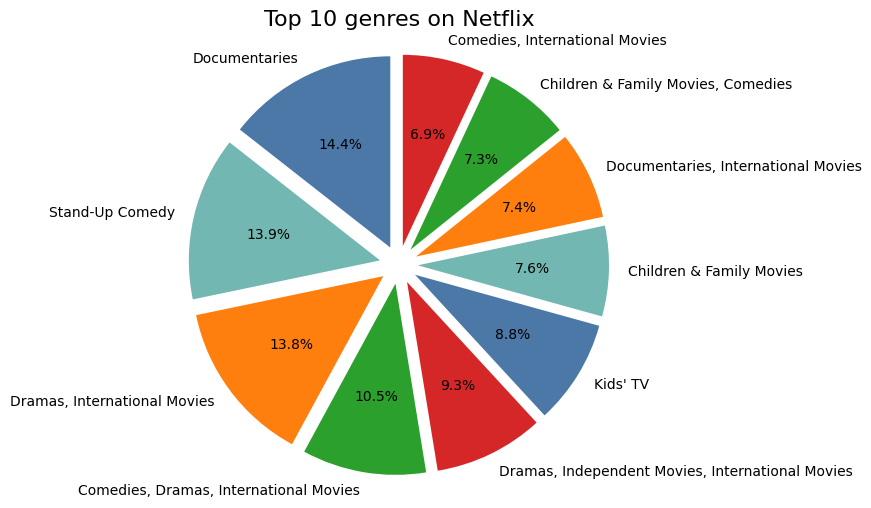

In [52]:

top_10_Genre = netflix_movies1['listed_in'].value_counts().head(10)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a pie chart
colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
explode = [0.1] * len(top_10_Genre)
ax.pie(top_10_Genre, labels=top_10_Genre.index, colors=colors, explode=explode, autopct='%.1f%%', startangle=90)

# Customize the chart
ax.set_title('Top 10 genres on Netflix', fontsize=16)
ax.axis('equal')

# Display the chart
plt.show()

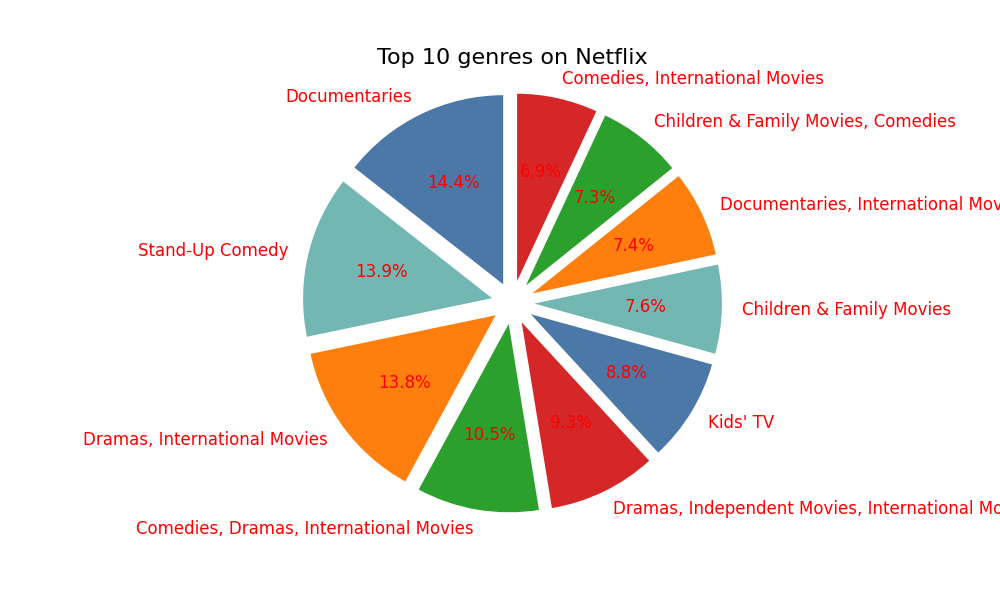

In [53]:
import matplotlib.pyplot as plt
import numpy as np

top_10_Genre = netflix_movies1['listed_in'].value_counts().head(10)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a pie chart
colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
explode = [0.1] * len(top_10_Genre)
wedges, texts, autotexts = ax.pie(top_10_Genre, labels=top_10_Genre.index, colors=colors, explode=explode, autopct='%.1f%%', startangle=90)

# Customize the chart
ax.set_title('Top 10 genres on Netflix', fontsize=16)
ax.axis('equal')

# Set font size and color for text labels
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('#FF0000')

# Remove the default black border around the wedges
for wedge in wedges:
    wedge.set_edgecolor('white')

# Save the figure and display as image
plt.savefig('pie_chart.png')
plt.close()

# Display the image
from IPython.display import Image
Image(filename='pie_chart.png')

1.**Why did you pick the specific chart?**

**Answer Here.**

The pie chart allows for easy comparison of the different genres and their proportions in the top 10. The use of colors and labels enhances the understanding of the data and makes it visually appealing. Additionally, the percentages displayed on the chart provide insights into the relative popularity of each genre.

2.**What is/are the insight(s) found from the chart?**

**Answer Here.**

In this chart, the top three genres on Netflix based on their distribution are:

1-**Documentaries:** 14.4%

2-**Stand-up Comedy:** 13.9%

3-**Drama, International Movies:**1 3.8%

These genres have the highest percentages compared to the other genres included in the top 10 list.

3.**Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here.**

The gained insights from analyzing the distribution of genres on Netflix can potentially help create a positive business impact in several ways

1-**Content Curation :** By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of movies and shows to its subscribers

2-**Targeted Acquisitions and Productions :** It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition

3-**Personalized Recommendations:** Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform.

#### Chart - 9

In [57]:

# Create a subset of the dataset with the required columns
country_vs_genre = netflix_movies1[['country', 'listed_in']]

# Define a function to separate all genres and store counts for each country
def country_wise_genre(country):
    # Filter the dataset for the specific country
    country_data = country_vs_genre[country_vs_genre['country'] == country]

    # Extract the genre column and drop missing values
    genres = country_data['listed_in'].dropna()

    # Split the genre strings into individual genres and count their occurrences
    genre_counts = genres.str.split(', ').explode().value_counts().to_dict()

    return genre_counts


In [58]:
conuntryVSgenre

,country,listed_in
0,Brazil,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Mexico,"Dramas, International Movies"
2,Singapore,"Horror Movies, International Movies"
3,United States,"Action & Adventure, Independent Movies, Sci-Fi..."
4,United States,Dramas
...,...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar...","Dramas, International Movies"
7783,India,"Dramas, International Movies, Music & Musicals"
7784,United States,"Documentaries, International Movies, Music & M..."
7785,Australia,"International TV Shows, Reality TV"


In [59]:


# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']

# Create an empty dictionary to store genre counts for each country.
country_wise_genre_dict = {}

# Iterate through all values in country_list.
for country in country_list:
    genre_counts = country_wise_genre(country)
    country_wise_genre_dict[country] = genre_counts

# Convert the dictionary to a DataFrame
country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
country_genre_count_df.rename(columns={'index': 'Genre'}, inplace=True)


In [60]:
country_genre_count_df

,Genre,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
0,Dramas,561,589.0,37.0,21.0,9.0,29.0,18.0,35.0,22.0,16.0
1,Comedies,500,293.0,31.0,38.0,NaN,17.0,5.0,31.0,16.0,5.0
2,Documentaries,425,18.0,79.0,20.0,NaN,22.0,1.0,16.0,10.0,5.0
3,Children & Family Movies,305,16.0,7.0,29.0,11.0,1.0,1.0,1.0,1.0,8.0
4,Independent Movies,287,129.0,24.0,15.0,NaN,8.0,NaN,11.0,12.0,4.0
5,TV Comedies,274,25.0,37.0,14.0,6.0,14.0,13.0,5.0,3.0,13.0
6,TV Dramas,262,24.0,21.0,18.0,20.0,19.0,28.0,9.0,5.0,15.0
7,Stand-Up Comedy,240,6.0,20.0,2.0,NaN,4.0,2.0,NaN,17.0,3.0
8,Action & Adventure,211,124.0,19.0,12.0,42.0,12.0,13.0,3.0,2.0,3.0
9,Kids' TV,202,10.0,18.0,20.0,12.0,15.0,9.0,2.0,3.0,9.0


In [61]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

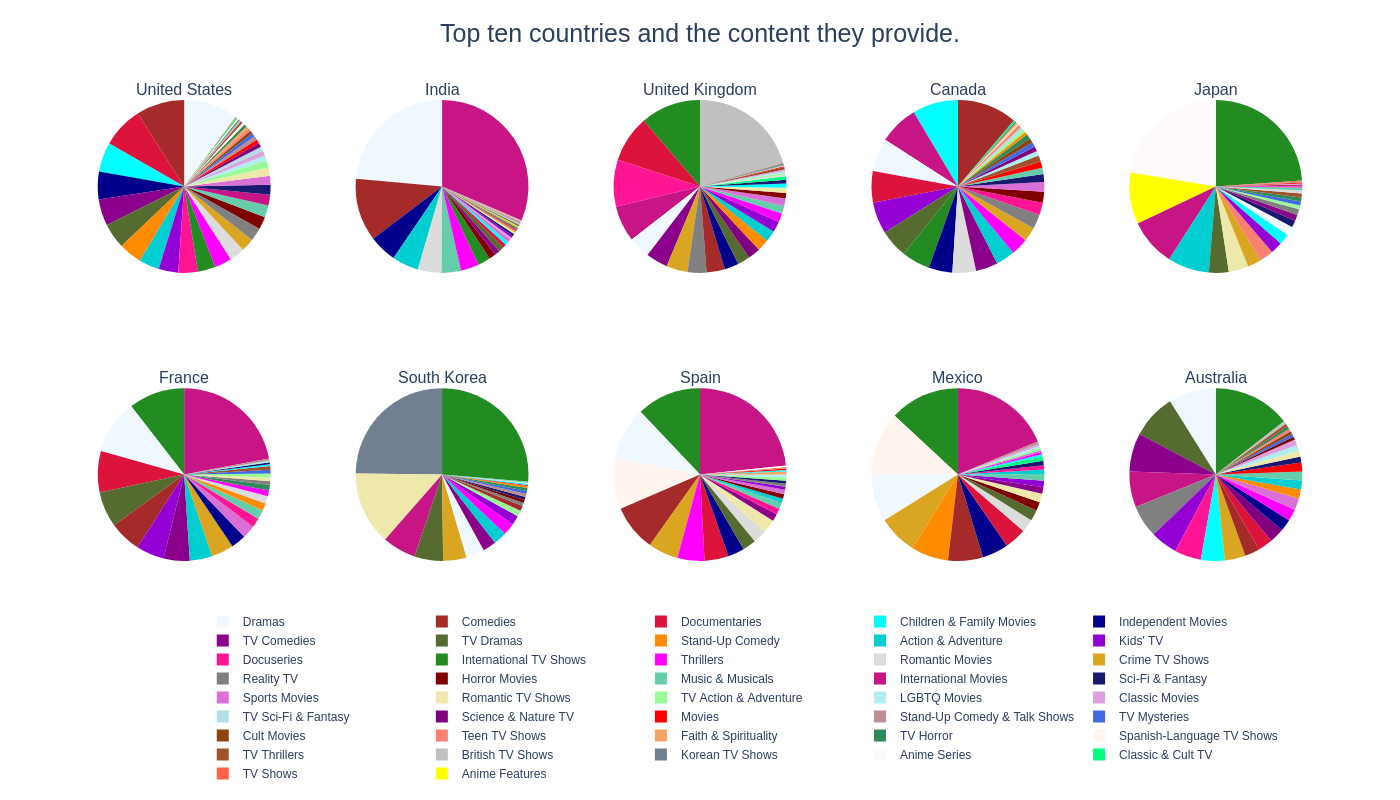

In [62]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**


**Answer Here.**

 It is suitable for showing the distribution of different genres across multiple countries. Each pie chart represents a country, and the slices of the pie represent different genres. The size of each slice indicates the proportion of content in that genre for a particular country. This allows for easy comparison of genre distribution across countries in a visually appealing manner.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

**Action & Adventure and Dramas are the most prevalent genres across all countries. They have the highest values in most countries, indicating their popularity.The United States has a diverse content offering across multiple genres, with a strong presence in Action & Adventure, Dramas, Comedies, and Documentaries**.


**India has a significant focus on Independent Movies and Dramas, with relatively fewer offerings in other genres.**

**The United Kingdom has a good balance between Drama, International TV Shows, and Documentaries.**

**Australia's content offering is diverse, with a relatively balanced distribution across various genres such as Dramas, Comedies, International TV Shows, and Documentaries.**

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights can potentially help create a positive business impact in the following ways:

1-**Targeted Content Strategy:** By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

2-**Market Expansion:**The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

3-**Content Localization:** Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.

#### Chart - 10

In [63]:
# Chart - 10 visualization code
# number of unique values
netflix_movies1['release_year'].nunique()

73

In [64]:
print(f'Oldest release year : {netflix_movies1.release_year.min()}')
print(f'Latest release year : {netflix_movies1.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


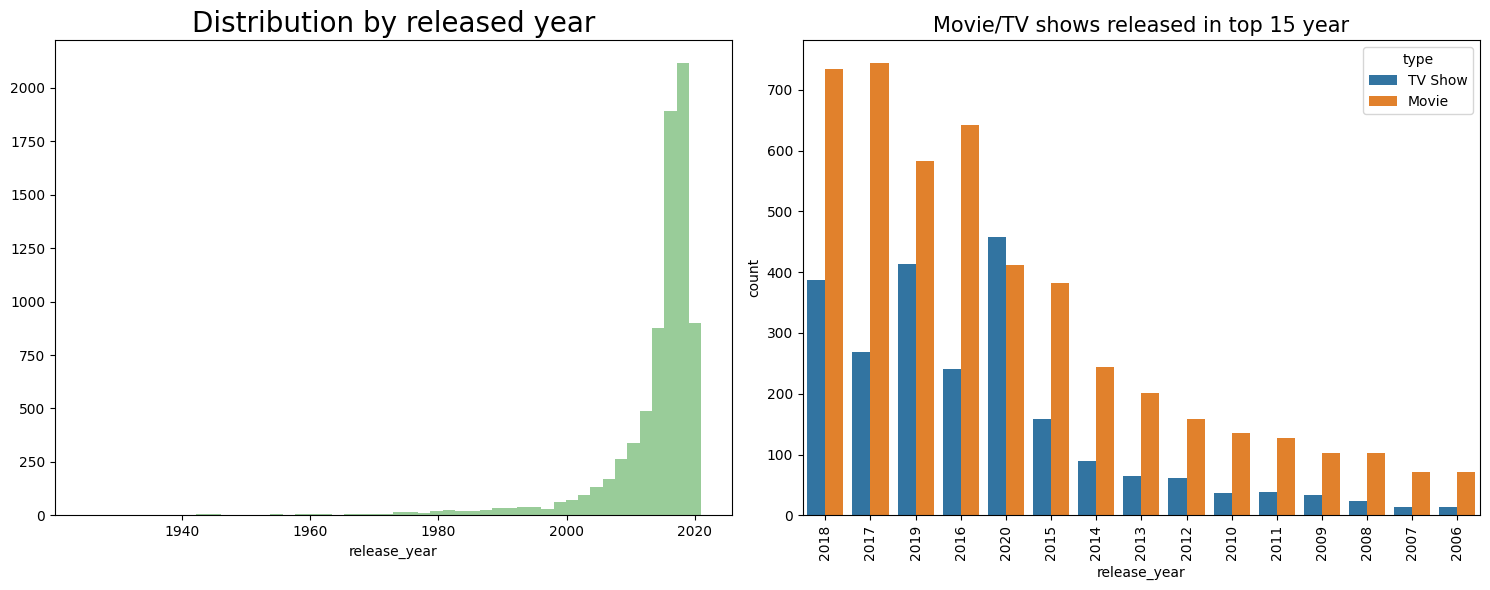

In [65]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(netflix_movies1['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_movies1, order=netflix_movies1['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

Answer Here.

The chosen chart combination of a histogram and a grouped bar plot allows for both univariate and bivariate analysis. The histogram provides an overview of the distribution of movie release years, while the bar plot allows for a comparison of the number of movies and TV shows released in the top 15 years.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The distribution of release years in the histogram shows a general trend of movies being released on Netflix starting from around 1980. The number of releases gradually increases, with significant growth observed from the year 2000 onwards. The highest peak in the distribution is observed between 2010 and 2020, indicating a high number of Movie/Tv shows releases during that period.

In terms of content type (Movies, TV shows), the bar graph highlights that 2017 and 2020 demonstrate the highest trends. These years exhibit a significant number of movie releases, TV show releases, and a combination of both on Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes, the gained insights can help create a positive business impact. By understanding the distribution of release years and identifying trends, businesses can make informed decisions regarding content acquisition, production, and marketing strategies.

#### Chart - 11

In [66]:
# Chart - 11 visualization code
#Ratings
# number of unique values
netflix_movies1.rating.nunique()

14

**Variables Description- Rating**

- **TV-Y**: This rating means that the content is appropriate for all children. It is aimed at children aged 2-6 and may include educational programming.

- **TV-Y7**: This rating means that the content is appropriate for children aged 7 and up. It may contain mild violence, comic mischief, or scary content that may not be suitable for younger children.

- **TV-Y7-FV:** This rating means that the content is appropriate for children aged 7 and up, but may contain more intense violence. The "FV" stands for "fantasy violence".

- **TV-G:** This rating means that the content is appropriate for all ages. It may contain mild language or violence, but nothing too intense.

- **TV-PG:** This rating means that parental guidance is suggested. The content may contain material that parents might find inappropriate for younger children. It may include mild to moderate language, violence, or suggestive content.

- **TV-14:** This rating means that the content is appropriate for viewers aged 14 and up. It may include intense violence, strong language, or sexual situations.

- **TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language.

- **G**- This rating means that the content is appropriate for all ages. It is usually intended for young children and may include animated or family-friendly content.

- **PG:** This rating means that parental guidance is suggested. The content may include mild violence, language, or suggestive themes.

- **PG-13:**This rating means that the content is appropriate for teens aged 13 and up. It may include intense violence, language, or suggestive content.

- **R:** This rating means that the content is intended for adults. It may include graphic violence, strong language, or nudity.

- **NC-17:** This rating means that the content is intended for mature audiences only and may contain explicit sexual content or violence that is not suitable for minors.

- **NR:** This rating means that no rating has been assigned yet or that the content is not rated by a particular board.

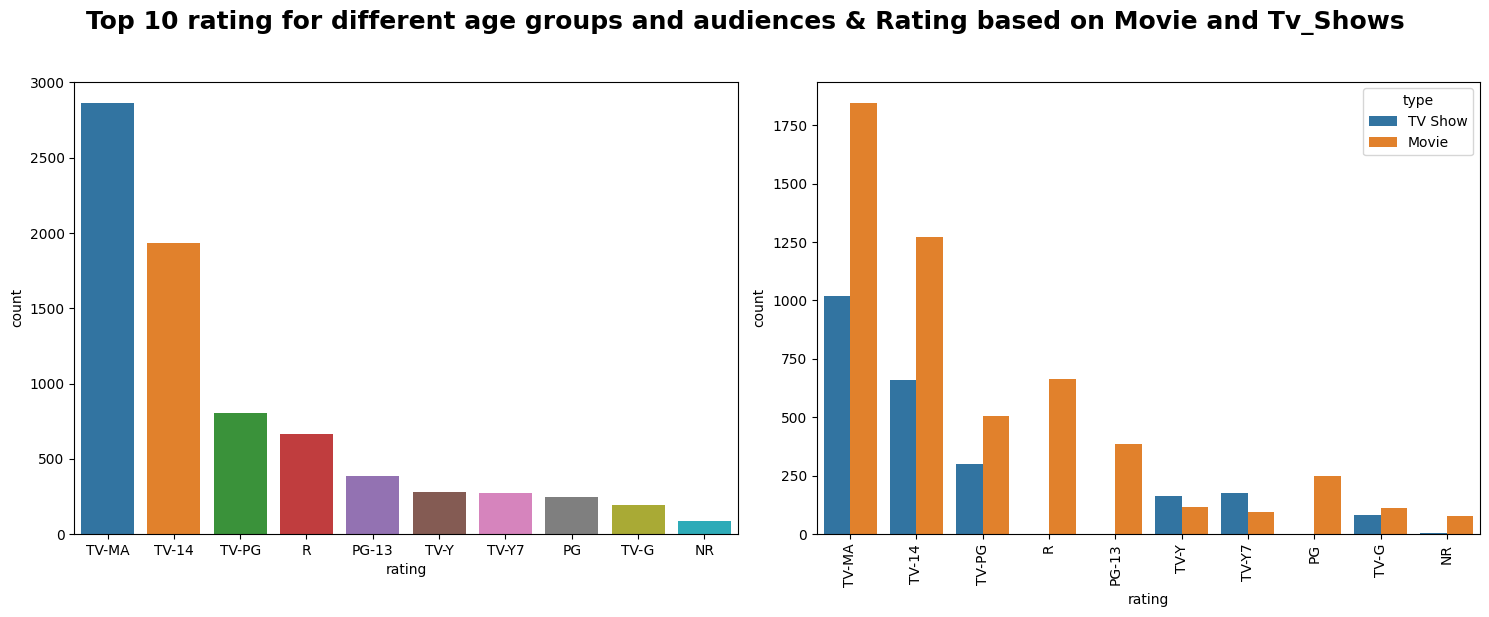

In [67]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=netflix_movies1, order=netflix_movies1['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_movies1, hue='type', order=netflix_movies1['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#####**1. Why did you pick the specific chart?**

**Answer Here.**

 The chosen chart combination of two count plots allows for both univariate and bivariate analysis. The first plot provides insights into the top 10 ratings across all content, while the second plot offers a comparison of ratings specifically for movies and TV shows.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

**TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language

In terms of ratings, the most common rating is **TV-MA**, which applies to both movies and TV shows.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The insight that **TV-MA** is the most common rating for both movies and TV shows can inform content strategies, audience targeting, programming decisions, and content diversity to drive positive business impact in terms of increased viewership and customer satisfaction.

#### Chart - 12

In [68]:
# Chart - 12 visualization code
import folium

# Create a map object
fig = folium.Map(location=[20, 0], zoom_start=2,tiles='stamenterrain')
import folium

# Define a dictionary of country names, coordinates, and colors
countries = {'United States': {'coords': [37.0902, -95.7129], 'color': 'red'},
             'India': {'coords': [20.5937, 78.9629], 'color': 'green'},
             'United Kingdom': {'coords': [55.3781, -3.4360], 'color': 'blue'},
             'Canada': {'coords': [56.1304, -106.3468], 'color': 'orange'},
             'Japan': {'coords': [36.2048, 138.2529], 'color': 'purple'},
             'France': {'coords': [46.2276, 2.2137], 'color': 'pink'},
             'South Korea': {'coords': [35.9078, 127.7669], 'color': 'gray'},
             'Spain': {'coords': [40.4637, -3.7492], 'color': 'black'},
             'Mexico': {'coords': [23.6345, -102.5528], 'color': 'brown'}}

# Loop over the dictionary and add markers for each country
for country, info in countries.items():
    folium.Marker(location=info['coords'], tooltip=country,
                   popup=f"Color: {info['color']}",
                   icon=folium.Icon(color=info['color'])).add_to(fig)

# Display the map
fig


#### Chart - 13

In [69]:
# Chart - 13 visualization code
# Replace the null values in director.
netflix_movies1['director']=netflix_movies1['director'].fillna('')

In [70]:
# Create a DataFrame with director counts
directors_list = netflix_movies1.director.value_counts().reset_index().head(15)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

# Create a bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Generate a list of 25 unique color codes using seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the plot
fig.show()


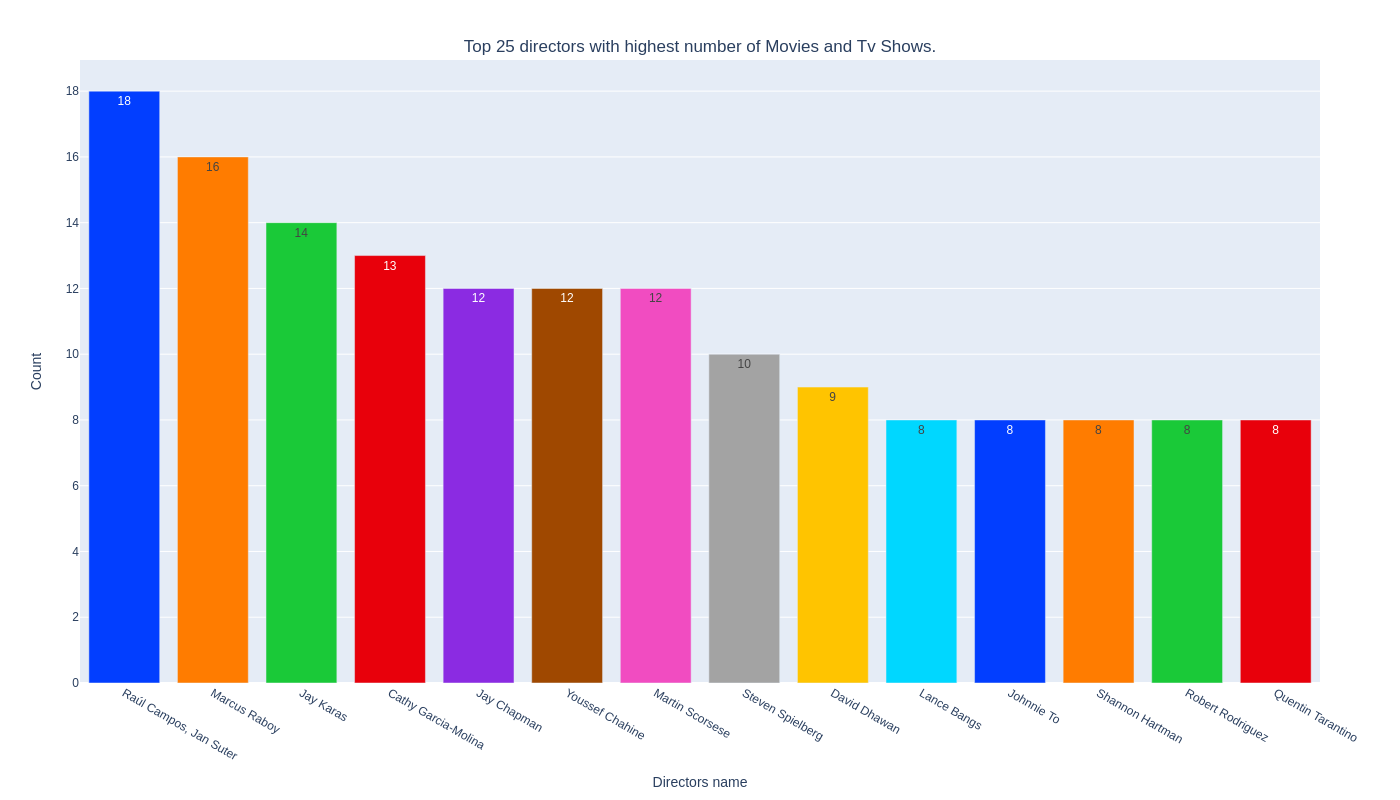

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

In [ ]:
directors_list

,Directors name,Count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Jay Chapman,12
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Lance Bangs,8


##### **1. Why did you pick the specific chart?**

**Answer Here.**

 The chosen chart effectively presents the data in an intuitive and visually appealing manner, allowing viewers to easily identify the directors with the most contributions on Netflix.

##### **2. What is/are the insight(s) found from the chart?**


**Answer Here**

The directors Raúl Campos and Jan Suter have the highest count in terms of overall Movies and TV shows on Netflix.

#### Chart - 14

In [ ]:
netflix_movies1['listed_in'].value_counts().head(25)

Documentaries                                           334
Stand-Up Comedy                                         321
Dramas, International Movies                            320
Comedies, Dramas, International Movies                  243
Dramas, Independent Movies, International Movies        215
Kids' TV                                                205
Children & Family Movies                                177
Documentaries, International Movies                     172
Children & Family Movies, Comedies                      169
Comedies, International Movies                          161
Dramas, International Movies, Romantic Movies           153
Comedies, International Movies, Romantic Movies         139
Dramas                                                  117
Action & Adventure, Dramas, International Movies        117
International TV Shows, TV Dramas                       111
Dramas, International Movies, Thrillers                 109
Crime TV Shows, International TV Shows, 

In [ ]:
import plotly.express as px
import pandas as pd

counts = netflix_movies1['listed_in'].value_counts().head(10)
average = counts.mean()

df = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
colors = px.colors.qualitative.Dark24[:10]
fig = px.bar(df, x='Category', y='Count', color='Category', color_discrete_sequence=colors)
fig.add_hline(y=average, line_color='red')
fig.update_layout(title='Top 10 Average Genere with Count',title_x=0.3)

fig.show()

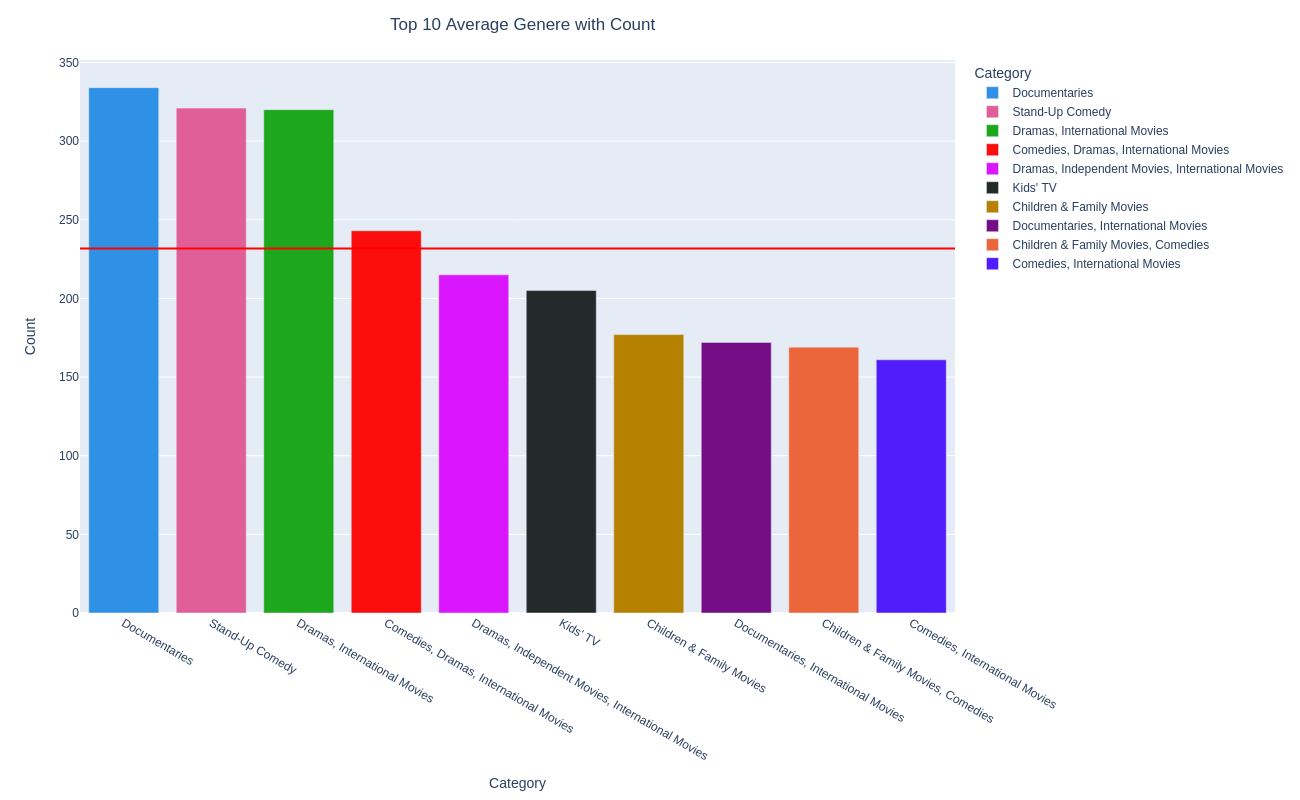

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1300, height=800, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**


**Answer Here.**

The chosen chart effectively presents the data, allowing viewers to easily compare the Average counts of different genres.

#####**2. What is/are the insight(s) found from the chart?**

**Answer Here**

The average count of genres in the top 10 categories lies between 200-250. The genre with the highest count among all the genres is Documentaries, with a count of 334.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes, the gained insights can help create a positive business impact for a streaming platform like Netflix or any other company in the entertainment industry.These insights, companies can refine their content strategies, enhance viewer satisfaction, attract a larger audience, and ultimately drive positive business impact in terms of increased viewership, customer retention, and revenue growth.

#### Chart - 15 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_movies1['target_ages'] = netflix_movies1['rating'].replace(ratings)


In [ ]:
# Preparing data for heatmap
netflix_movies1['count'] = 1
data = netflix_movies1.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = netflix_movies1.loc[netflix_movies1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.364444,0.77,0.469945,0.835821,0.513854,0.471550
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.02,0.027322,0.022388,0.093199,0.089601
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.07,0.120219,0.044776,0.204030,0.195553
Teens,0.146893,0.683168,0.165217,0.567714,0.355556,0.14,0.382514,0.097015,0.188917,0.243296


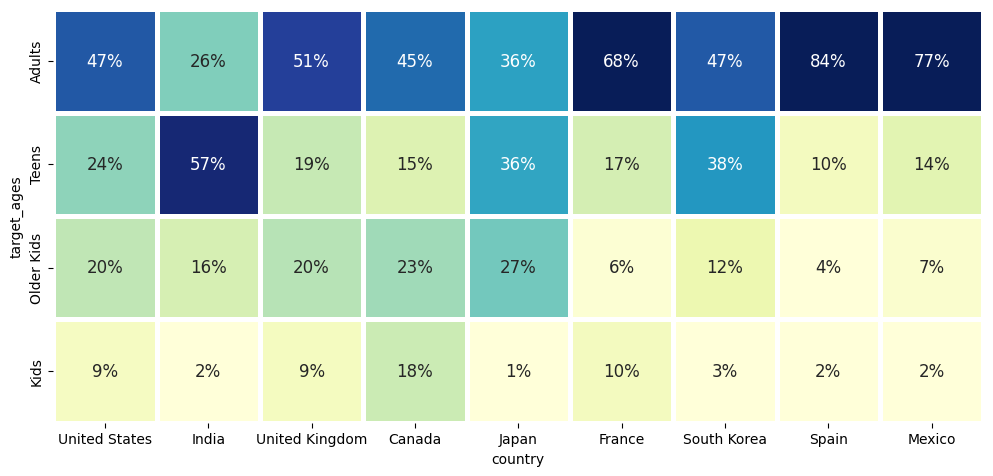

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


**1. Why did you pick the specific chart?**


**Answer Here**

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.**France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.**India**- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.**United Kingdom** -It has a relatively high level of interest among adults, with 51% expressing interest.

4.**Mexico**-Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

5.**South Korea** , **United States**- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

6.**Japan**- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

7.**Canada**- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries**.

3.**Will the gained insights help creating a positive business impact?**

**Answer Here**

The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

#### Chart - 16 - Correlation Heatmap

In [ ]:
netflix_movies1['count'] = 1
data1 = netflix_movies1.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

In [ ]:
data1

0                                       Documentaries
1                                     Stand-Up Comedy
2                        Dramas, International Movies
3              Comedies, Dramas, International Movies
4    Dramas, Independent Movies, International Movies
5                                            Kids' TV
6                            Children & Family Movies
7                 Documentaries, International Movies
8                  Children & Family Movies, Comedies
9                      Comedies, International Movies
Name: listed_in, dtype: object

In [ ]:
df_heatmap1 = netflix_movies1.loc[netflix_movies1['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in,Children & Family Movies,"Children & Family Movies, Comedies","Comedies, Dramas, International Movies","Comedies, International Movies",Documentaries,"Documentaries, International Movies","Dramas, Independent Movies, International Movies","Dramas, International Movies",Kids' TV,Stand-Up Comedy
target_ages,,,,,,,,,,
Adults,0.000000,0.000000,0.345679,0.484472,0.386228,0.377907,0.660465,0.468750,0.000000,0.894081
Kids,0.564972,0.177515,0.004115,0.012422,0.059880,0.063953,0.004651,0.006250,0.565854,0.000000
Older Kids,0.435028,0.816568,0.123457,0.099379,0.254491,0.238372,0.083721,0.109375,0.434146,0.018692
Teens,0.000000,0.005917,0.526749,0.403727,0.299401,0.319767,0.251163,0.415625,0.000000,0.087227


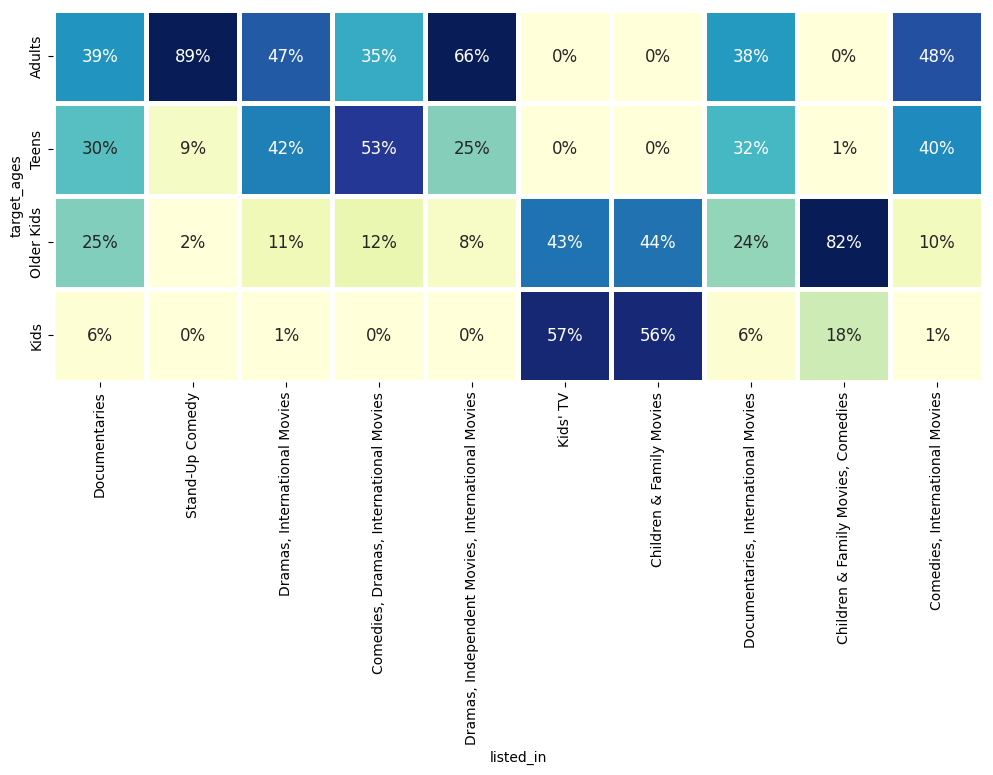

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### **1. Why did you pick the specific chart?**


**Answer Here.**

The heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The genre with the highest target audience of 89% adults is stand-up comedy.Children & Family Movies,Comedies also have a significant target audience with 82%. Primarily catering to older kids ,adults, Kids & TV shows have a target audience of around 66% to 53%.

#### **Chart - 17**

In [ ]:
country_count=netflix_movies1['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,3062
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101
Turkey,100


In [ ]:
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()


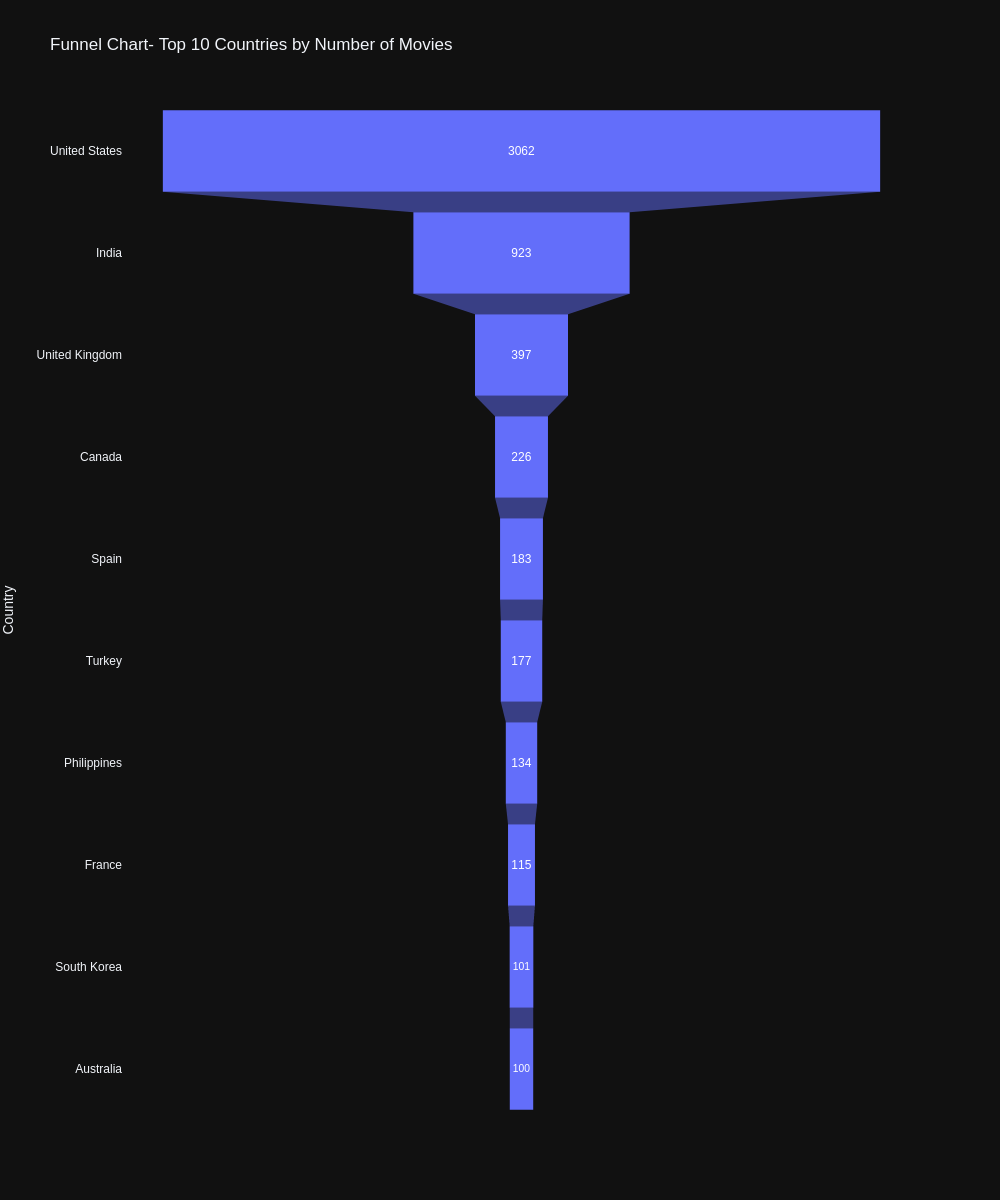

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=1200, scale=1)
Image(img_bytes)

1.**Why did you pick the specific chart?**

**Answer Here.**

 Funnel charts are often used to represent a gradual reduction in data as it moves through different stages or categories. In this case, the chart visualizes the number of movies in the top 10 countries, showcasing the decreasing count from the top to the bottom.


2.**What is/are the insight(s) found from the chart?**

**Answer Here.**

The United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies, demonstrating a significant presence in the global Movies/Tv shows market.

3.**Will the gained insights help creating a positive business impact?**


**Answer Here.**

Yes, the gained insights can help create a positive business impact in several ways:

1-**Talent Acquisition :** This insight can be valuable for businesses looking to recruit skilled individuals in areas such as filmmaking, writing, acting, or technical roles.

2**-Market Expansion:**The insights reveal countries with a significant number of movies, such as the United States and India. This information can guide businesses in expanding their operations and targeting these markets for distribution, marketing, and partnerships.

# 4. **Hypothesis Testing**


In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies1.copy()
#head of df_hypothesis
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,1


In [ ]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,1


In [ ]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**

**Hypothetical Statement - 1**

**1.State Your research hypothesis as a null hypothesis and alternate hypothesis.**

**Answer Here**

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

**2.Perform an appropriate statistical test.**


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**Answer Here.**

**t-value** is not in the range, the **null hypothesis is rejecte**d.

**As a result, movies rated for kids and older kids are not at least two hours long.**

**Hypothetical Statement - 2**

**1.State Your research hypothesis as a null hypothesis .**

**Answer Here.**

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies1.copy()
#head of df_hypothesis
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,1


In [ ]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
netflix_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1


In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [ ]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


Which statistical test have you done to obtain P-Value?


t-distribution

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

**Answer Here.**

Because the t-value is not in the range, the null hypothesis is rejected.

**As a result, The duration which is more than 90 mins are movies**

# **5. Feature Engineering & Data Pre-processing**

In [ ]:
# Combining all the clustering attributes into a single column
netflix_movies1['clustering'] = (netflix_movies1['director'] + ' ' + netflix_movies1['cast'] +' ' +
                                 netflix_movies1['country'] +' ' + netflix_movies1['listed_in'] +
                                 ' ' + netflix_movies1['description'])

In [ ]:
netflix_movies1['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe No cast United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

# **Textual Data Preprocessing**

In [ ]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [ ]:
netflix_movies1['Clean_Text'] = netflix_movies1['clustering'].apply(transform_text)

In [ ]:
netflix_movies1["Clean_Text"][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

# **Text Vectorization**

**TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).**

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

**TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)**

**Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives higher weight to terms that appear less frequently in the entire collection. It is calculated using the formula:**


**IDF(t) = log_e(Total number of documents / Number of documents containing term t)**

In [ ]:
bag_of_words = netflix_movies1.Clean_Text

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7787, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şafak', 'şahin', 'şinasi'], dtype=object)

**Which text vectorization technique have you used and why?**


**Answer Here.**

# **Dimesionality Reduction**

**Do you think that dimensionality reduction is needed? Explain Why**

**Answer Here.**

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

**Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**

In [ ]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

**Answer Here**

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

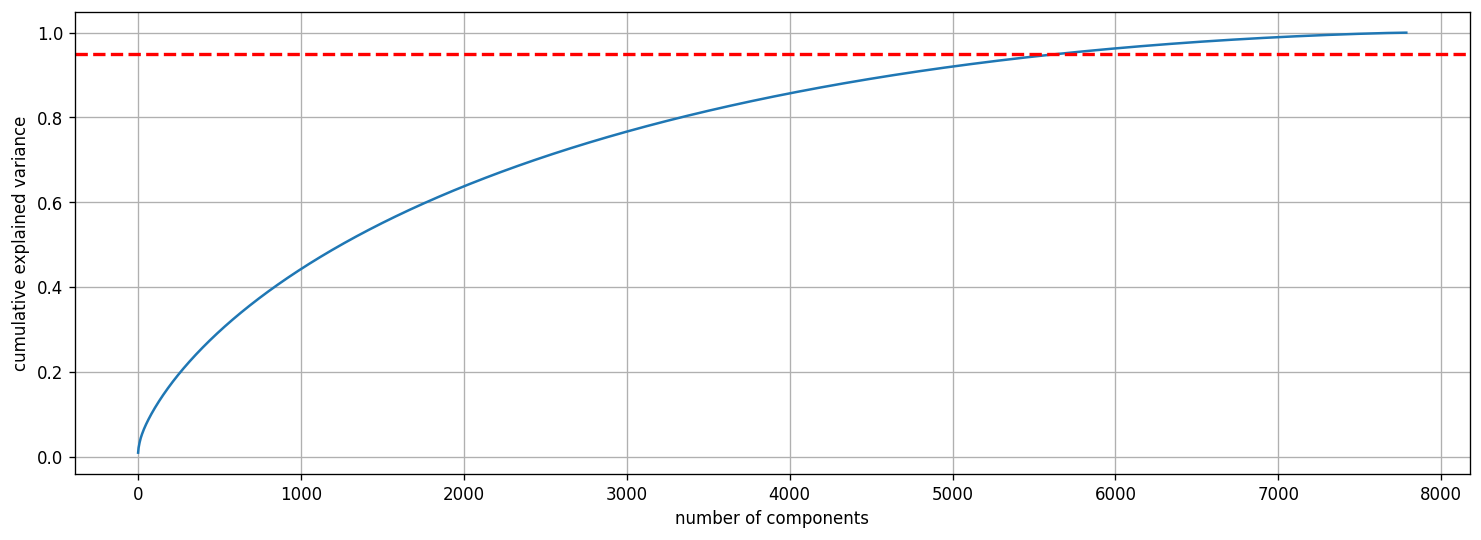

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

**The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.**

In [ ]:
# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)

(7787, 5653)


In [ ]:
X_transformed

array([[ 0.11980329, -0.02267127, -0.0122462 , ..., -0.00730293,
        -0.00697236, -0.00237195],
       [-0.04132775, -0.03107014,  0.02087998, ...,  0.00188454,
         0.01496376, -0.00731461],
       [-0.04110578, -0.04962319, -0.00337514, ..., -0.00691715,
         0.0026895 ,  0.00938257],
       ...,
       [-0.06622165,  0.11541688,  0.17191054, ..., -0.00495482,
         0.01456018, -0.0025139 ],
       [ 0.09595272,  0.00747056, -0.0022959 , ...,  0.00854873,
         0.00294345, -0.005817  ],
       [-0.07624317,  0.27774587,  0.18705256, ..., -0.00898035,
        -0.00039413,  0.00085025]])

# **6. ML Model Implementation**

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

**The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters** .

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(15)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Add cluster values to the dateframe.
netflix_movies1['cluster_number'] = kmeans.labels_

In [ ]:
netflix_movies1.head(1)

In [ ]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = netflix_movies1['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)

In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_movies1[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()

In [ ]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Broadway,Remastered,Christmas ,Friends Orchestra

**Country**- United Kingdom,Argentina,United States,India

**Rating** -TV-MA,PG-TV

**Listed_in** -  Dramas International,Musical Dramas,Musicial
            Documentaries,Comedies International

**Description**- Documentary ,Music,One,Bad,Tour ,Love.

In [ ]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Special, America,Time,Live,Comedy, Netflix Alive,
  Martin

**Country** - United States,Brazil,Mexico,Italy

**Rating** -TV-MA,TV-PG

**Listed_in** - Tv-Comedies, Comedy Stand, Talk shows


**Description**- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

# 7- **Recommender system**

A **recommender system is a type of information filtering system that suggests items to users based on their preferences**, interests, or past behavior. **It is commonly used in various applications such as e-commerce websites, streaming platforms, social media, and more.** The goal of a recommender system is to provide personalized recommendations that are relevant and helpful to the individual user.

**Content-based filtering:** This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.

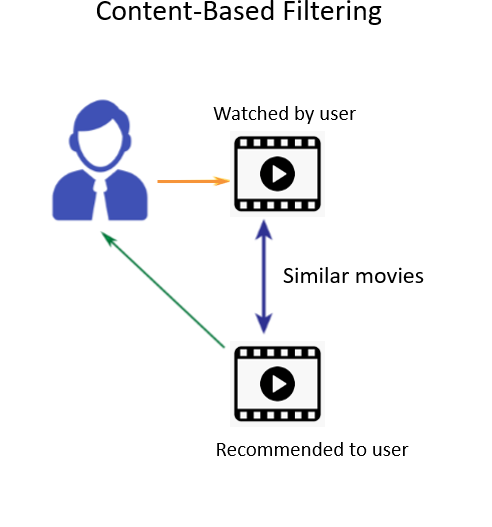

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_movies1['description'] = netflix_movies1['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_movies1['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

In [ ]:
indices = pd.Series(netflix_movies1.index, index=netflix_movies1['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_movies1['title'].iloc[movie_indices]

In [ ]:
netflix_movies1['title'][1:70]

In [ ]:
get_recommendations( '14 Cameras',cosine_sim)


#**8- Conclusion**

**1-** It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

**2-** Most of these shows are released either at the end or the beginning of the year.

**3-** The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content, six of them are from India.

**4-** When it comes to content ratings, TV-MA tops the charts,
 indicating that mature content is more popular on Netflix.

**5-** The value of k=15 was found to be optimal for clustering the data, and it was used to group the content into ten distinct clusters.

**6-** Using this data, a Content based recommender system was created using cosine similarity, which provided recommendations for Movies and TV shows.

# **9. Future Work**


- Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering  can lead to numerous intriguing discoveries.

- By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread